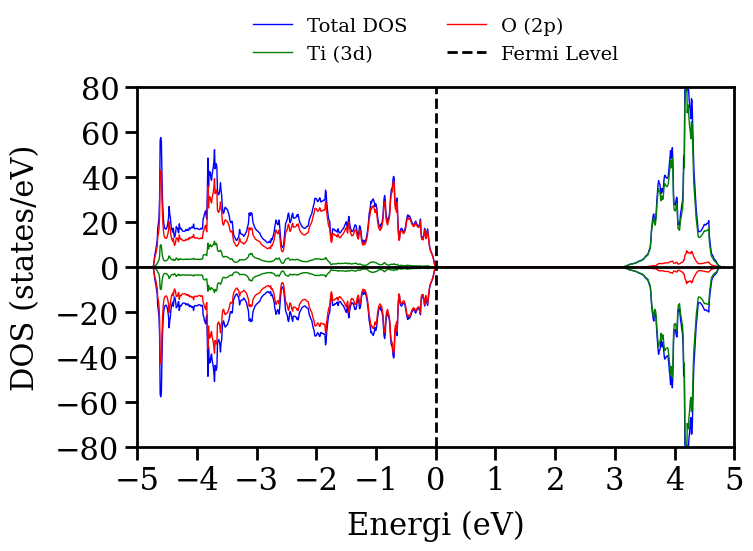

In [13]:
# Import the necessary packages and modules
import matplotlib.pyplot as plt
plt.style.use('../../matplotlib/sci.mplstyle')
import numpy as np

# The Fermi energy, find it in nscf.out
efermi = 7.501
shift = 7.501
# Define the function to read the data file
def r_dos(name):
    ener, dosu, dosd = np.loadtxt(name, usecols=(0,1,2), unpack=True)
    return ener, dosu, dosd

# Read total DOS
ener, dosu, dosd = r_dos('elektro.pdos_tot')

# Read and sum PDOS Ti
ti_indices = [1,2,3,4,13,14,15,16,25,26,27,28,37,38,39,40]
d_up_sum = np.zeros_like(dosu)
d_down_sum = np.zeros_like(dosd)

for i in ti_indices:
    _, d_up, d_down = r_dos(f'elektro.pdos_atm#{i}(Ti)_wfc#4(d)')
    d_up_sum += d_up   
    d_down_sum += d_down 

    
# Read and sum PDOS O
o_indices = list(range(5,13)) + list(range(17,25)) + list(range(29,37)) + list(range(41,49))
p_up_sum = np.zeros_like(dosu)
p_down_sum = np.zeros_like(dosd)
for i in o_indices:
    _, p_up, p_down = r_dos(f'elektro.pdos_atm#{i}(O)_wfc#2(p)')
    p_up_sum += p_up 
    p_down_sum += p_down

# Simpan hasil gabungan ke file: Energy, Total DOS, Ti-d, O-p
data = np.column_stack((ener - shift, dosu, dosd, d_up_sum, d_down_sum, p_up_sum, p_down_sum))
np.savetxt('pristine.dat', data, header='Energy(eV)    dos_up    dos_down    Ti_d_up    Ti_d_down    O_p_up    O_p_down')

# Plotting
plt.figure(figsize=(8,6))

# Plot total DOS
plt.plot(ener - shift, dosu, color='b', linewidth=1, label='Total DOS')
plt.plot(ener - shift, -dosd, color='b', linewidth=1)


# Plot Ti-d and O-p
plt.plot(ener - shift, d_up_sum, color='green', linewidth=1, label='Ti (3d)')
plt.plot(ener - shift, -d_down_sum, color='green', linewidth=1)
plt.plot(ener - shift, p_up_sum, color='r', linewidth=1, label='O (2p)')
plt.plot(ener - shift, -p_down_sum, color='r', linewidth=1)

# Vertical line for Fermi level
plt.axvline(efermi - shift, color='k', linestyle='--', linewidth=2, label='Fermi Level')
plt.axhline(y=0, color='k')
# Axis labels and limits
plt.xlabel('Energi (eV)')
plt.ylabel('DOS (states/eV)')
plt.xlim(-5, 5)
plt.ylim(-80,80)
plt.yticks(np.arange(-80, 81, 20))
plt.xticks(np.arange(-5, 5.1, 1))

plt.minorticks_off()

plt.tick_params(axis='both', which='both', top=False, right=False, direction='out')
# Legend in upper right inside plot
plt.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1.02),
    ncol=2,
    fontsize=14,
    frameon=False
)


# Save and show
plt.tight_layout()
plt.savefig('plot-pdos.jpg')
plt.show()
